In [53]:
import pandas as pd
from urllib.request import Request, urlopen
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import re
# path = "D:\projects\covid\\"
# file = 'data.json'
# df = pd.read_json(path+file)
today = datetime.now()
yesterday = today - timedelta(hours=24)
today = today.strftime('%Y-%m-%d')
yesterday = yesterday.strftime('%Y-%m-%d')
print(today)
print(yesterday)

# def addNotFound(df):
#     empty = {'Age':['0 - 10','11 - 20','21 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 80','80+','N/A'],'Value':[0 for _ in range(10)]}
#     emptydf= pd.DataFrame(empty, columns=['Age','Value'])
#     new_df = df
#     try:
#         for index,i in enumerate(emptydf.to_dict(orient="list")['Age']):
#                 if str(emptydf.to_dict(orient="list")['Age'][index]) not in df.to_dict(orient="list")['Age']:
#                     print(emptydf.to_dict(orient="list")['Age'][index],emptydf.to_dict(orient="list")['Value'][index])
#                     new_df = new_df.append({'Age':str(emptydf.to_dict(orient="list")['Age'][index]),'Value':emptydf.to_dict(orient="list")['Value'][index]},ignore_index=True,sort=True)
#         return new_df.sort_values(by='Age')
#     except:
#         return df
    

def total(data):
    total = 0
    for i in range(len(data)):
        total = total + data[i]
    return total

2022-01-26
2022-01-25


In [55]:
url = f'https://portal.edcd.gov.np/rest/api/fetch?filter=casesBetween&type=dayByDay&sDate={yesterday}&eDate={today}&disease=COVID-19'
print(url)
req = Request(url)
req.add_header('Origin', 'https://covid19.mohp.gov.np')
req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.137 Safari/537.36')
req.add_header('Referer', 'https://covid19.mohp.gov.np')
req.add_header('Cache-Control', 'no-cache')
req.add_header('Host', 'portal.edcd.gov.np')

with urlopen(req) as rq:
    data = rq.read().decode('utf-8')

#print(data)
data = data.replace('null','"N/A"')

https://portal.edcd.gov.np/rest/api/fetch?filter=casesBetween&type=dayByDay&sDate=2022-01-25&eDate=2022-01-26&disease=COVID-19


In [56]:
#print(data)

In [34]:
df = pd.read_json(data,orient='records')
print(df)

        Province              District     Sex      Age      Period  Value
0        Bagmati         306 KATHMANDU  Female      80+  2022-01-26     20
1     Province 2           203 DHANUSA    Male  21 - 30  2022-01-26      9
2        Gandaki  408 NAWALPARASI EAST  Female  11 - 20  2022-01-25      1
3        Bagmati          308 LALITPUR  Female      80+  2022-01-26      1
4     Province 1           113 SUNSARI    Male  61 - 70  2022-01-25      5
...          ...                   ...     ...      ...         ...    ...
1222     Bagmati           304 DHADING  Female  41 - 50  2022-01-25      2
1223  Province 2         204 MAHOTTARI    Male  51 - 60  2022-01-25      1
1224     Gandaki            404 MYAGDI    Male  41 - 50  2022-01-25      1
1225     Lumbini             504 GULMI  Female  31 - 40  2022-01-25      1
1226     Bagmati         306 KATHMANDU  Female  51 - 60  2022-01-26     94

[1227 rows x 6 columns]


In [35]:
df1 = df[df['Period'].str.contains(yesterday, na=False)]
overallcases = df1['Value'].sum()
print(df1)

        Province              District     Sex      Age      Period  Value
2        Gandaki  408 NAWALPARASI EAST  Female  11 - 20  2022-01-25      1
4     Province 1           113 SUNSARI    Male  61 - 70  2022-01-25      5
5        Bagmati          313 CHITAWAN  Female  11 - 20  2022-01-25      2
6     Province 1           113 SUNSARI    Male      N/A  2022-01-25      3
9     Province 2            202 SIRAHA  Female  31 - 40  2022-01-25      2
...          ...                   ...     ...      ...         ...    ...
1220     Lumbini             504 GULMI    Male  21 - 30  2022-01-25      3
1222     Bagmati           304 DHADING  Female  41 - 50  2022-01-25      2
1223  Province 2         204 MAHOTTARI    Male  51 - 60  2022-01-25      1
1224     Gandaki            404 MYAGDI    Male  41 - 50  2022-01-25      1
1225     Lumbini             504 GULMI  Female  31 - 40  2022-01-25      1

[615 rows x 6 columns]


In [43]:
district = 'KATHMANDU'

In [44]:
ddata = df1[df1['District'].str.contains(district, na=False)].sort_values(by='Age')
# ddata['Sex'].replace('Male','Other',regex=True)
# ddata['Age'] = ddata['Age'].apply(lambda x: 'other' x is None)
totalcases = ddata['Value'].sum()
print(ddata.reset_index(drop=True))

   Province            District     Sex      Age      Period  Value
0   Bagmati  309 KAVREPALANCHOK  Female   0 - 10  2022-01-25      1
1   Bagmati  309 KAVREPALANCHOK    Male   0 - 10  2022-01-25      2
2   Bagmati  309 KAVREPALANCHOK    Male  11 - 20  2022-01-25      6
3   Bagmati  309 KAVREPALANCHOK  Female  11 - 20  2022-01-25      1
4   Bagmati  309 KAVREPALANCHOK  Female  21 - 30  2022-01-25     51
5   Bagmati  309 KAVREPALANCHOK    Male  21 - 30  2022-01-25     41
6   Bagmati  309 KAVREPALANCHOK    Male  31 - 40  2022-01-25     33
7   Bagmati  309 KAVREPALANCHOK  Female  31 - 40  2022-01-25     29
8   Bagmati  309 KAVREPALANCHOK    Male  41 - 50  2022-01-25     21
9   Bagmati  309 KAVREPALANCHOK  Female  41 - 50  2022-01-25      9
10  Bagmati  309 KAVREPALANCHOK    Male  51 - 60  2022-01-25      7
11  Bagmati  309 KAVREPALANCHOK  Female  51 - 60  2022-01-25      6
12  Bagmati  309 KAVREPALANCHOK    Male  61 - 70  2022-01-25      2
13  Bagmati  309 KAVREPALANCHOK    Male      80+

In [45]:
plotr = ddata[['Sex','Age','Value']].groupby(['Sex','Age'],as_index=False).agg('sum')
print(plotr)

       Sex      Age  Value
0   Female   0 - 10      1
1   Female  11 - 20      1
2   Female  21 - 30     51
3   Female  31 - 40     29
4   Female  41 - 50      9
5   Female  51 - 60      6
6     Male   0 - 10      2
7     Male  11 - 20      6
8     Male  21 - 30     41
9     Male  31 - 40     33
10    Male  41 - 50     21
11    Male  51 - 60      7
12    Male  61 - 70      2
13    Male      80+      1
14    Male      N/A      2


<AxesSubplot:xlabel='Age'>

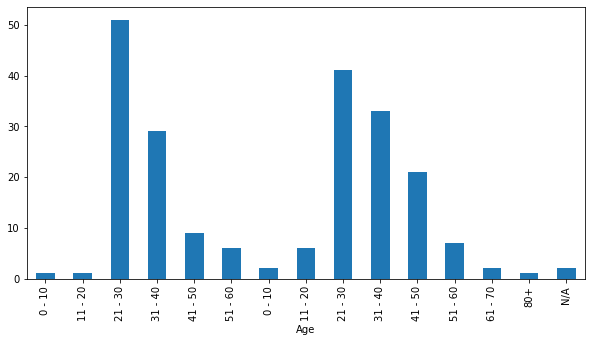

In [46]:
plotr.set_index('Age')['Value'].plot(kind='bar',figsize=(10,5))

In [125]:
def addNotFound(df):
    empty = {'Age':['0 - 10','11 - 20','21 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 80','80+','N/A'],'Value':[0 for _ in range(10)]}
    emptydf= pd.DataFrame(empty, columns=['Age','Value'])
    new_df = df
    try:
        #new_df = pd.concat([emptydf([i],columns=['Age','Value']) for i in emptydf.to_dict(orient="list")['Age']],ignore_index=True)
        new_df = pd.concat([emptydf,df],ignore_index=True, axis = 0)
        return new_df.groupby(['Age'],as_index=False).agg('sum').sort_values(by='Age')
    except Exception as e:
        print(e)
        #return df

plotr_men = addNotFound(plotr[plotr['Sex'].str.contains('Male', na=False)].sort_values(by='Age')[['Age','Value']])
plotr_women = addNotFound(plotr[plotr['Sex'].str.contains('Female', na=False)].sort_values(by='Age')[['Age','Value']])

In [126]:
print(plotr_women.reset_index(drop=True))

       Age  Value
0   0 - 10      1
1  11 - 20      1
2  21 - 30     51
3  31 - 40     29
4  41 - 50      9
5  51 - 60      6
6  61 - 70      0
7  71 - 80      0
8      80+      0
9      N/A      0


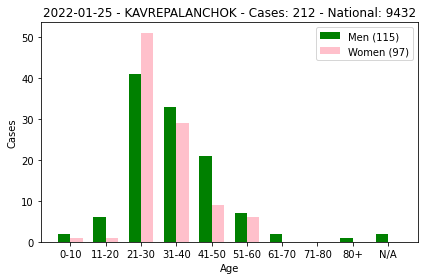

KAVREPALANCHOK - 2022-01-25



In [127]:
#https://www.w3resource.com/graphics/matplotlib/barchart/matplotlib-barchart-exercise-10.php
groups = len(plotr_men['Age'])
men = [x for x in plotr_men['Value']]
women = [x for x in plotr_women['Value']]
age = [str(x).replace(' ','') for x in plotr_women['Age']]

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.35
opacity = 1

rects1 = plt.bar(index, 
                 men, 
                 bar_width,
                 alpha=opacity,
                 color='green',
                 label=f'Men ({total(men)})')

rects1 = plt.bar(index + bar_width, 
                 women, 
                 bar_width,
                 alpha=opacity,
                 color='pink',
                 label=f'Women ({total(women)})')

plt.xlabel('Age')
plt.ylabel('Cases')
plt.title(f'{yesterday} - {district} - Cases: {totalcases} - National: {overallcases}')
plt.xticks(index + bar_width/2, age)
plt.legend()
plt.tight_layout()
plt.show()
print(f'{district} - {yesterday}')

print()

In [ ]:
#plotr_women.append({'Age':'80+','Value':0},ignore_index=True,sort=True)

In [14]:
# for index,i in enumerate(emptydf.to_dict(orient="list")['Age']):
#     print(emptydf.to_dict(orient="list")['Age'][index])

In [15]:
#emptydf.to_dict(orient="list")

In [16]:
#totalcases = ddata['Value'].sum()

In [17]:
#totalcases